In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("boston_housing.csv")
print("----------------first 5 ------------------- \n" , df.head())
print("----------------Last 5 --------------------\n",df.tail())
print("----------------Random 5 -------------------\n", df.sample(5))

----------------first 5 ------------------- 
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
----------------Last 5 --------------------
         crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.5

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

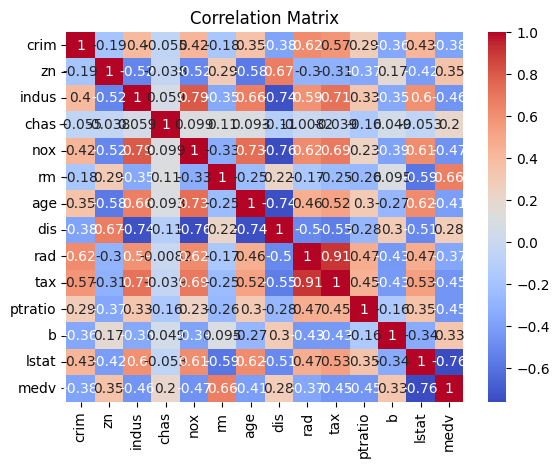

In [24]:
# Feature Engineering: Find out most relevant features
# Display correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [10]:
def BuildModel(X, Y):
    # 1. divide the dataset into training and testing 80%train 20%testing
    # 2. Choose the model (linear regression)
    # 3. Train the model using training data
    # 4. Test the model using testing data 
    # 5. Improve the performance of the model
    # Training and testing data
    from sklearn.model_selection import train_test_split
    # Assign test data size 20%
    xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.20, random_state=0)
    # Model selection and training
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model = model.fit(xtrain,ytrain) #Training
    #Testing the model & show its accuracy / Performance
    ypred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    print('MAE:',mean_absolute_error(ytest,ypred))
    print("Model Score:",model.score(xtest,ytest))


In [ ]:
def buildModel(X,Y):
    from sklearn.model_selection import train_test_split
    xtest,ytest,xtrain,ytrain = train_test_split(X,Y,test_size = 0.8,random_state = 0)
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    from sklearn.metrics import mean_absolute_error 
    print(mean_absolute_error(ytest,ypred))
    print(model.score(xtest,ytest)) 

In [11]:
X = df[['ptratio','lstat']] #input variables
Y = df['medv'] #output variable
BuildModel(X, Y)


MAE: 5.1367091986231115
Model Score: 0.3677458017865485


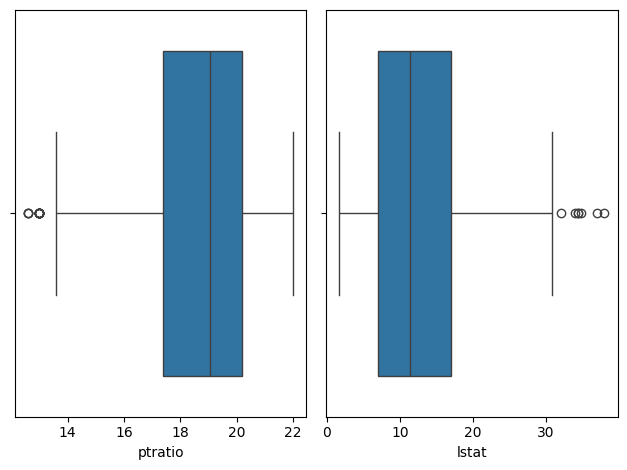

In [12]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()


In [13]:
def RemoveOutlier(df,var):
    
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high = Q3+1.5*IQR
    low = Q1-1.5*IQR

    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:',var,':',count)
    
    df = df[((df[var] >= low) & (df[var] <= high))]
    
    return df

In [14]:
df = RemoveOutlier(df, 'ptratio')
df = RemoveOutlier(df, 'lstat')
# df = RemoveOutlier(df,'rm')

Highest allowed in variable: ptratio 24.4
lowest allowed in variable: ptratio 13.199999999999998
Total outliers in: ptratio : 15
Highest allowed in variable: lstat 32.09250000000001
lowest allowed in variable: lstat -7.847500000000005
Total outliers in: lstat : 6


In [15]:
X = df[['ptratio','lstat']]
Y = df['medv']
BuildModel(X, Y)

MAE: 4.529788999143722
Model Score: 0.5362875680057495


In [16]:
# after feature engineering selecting 3 variables
# Choosing input and output variables from correlation matrix
X = df[['rm','lstat', 'ptratio']]
Y = df['medv']
BuildModel(X, Y)

MAE: 4.030709795767343
Model Score: 0.5925717947605275


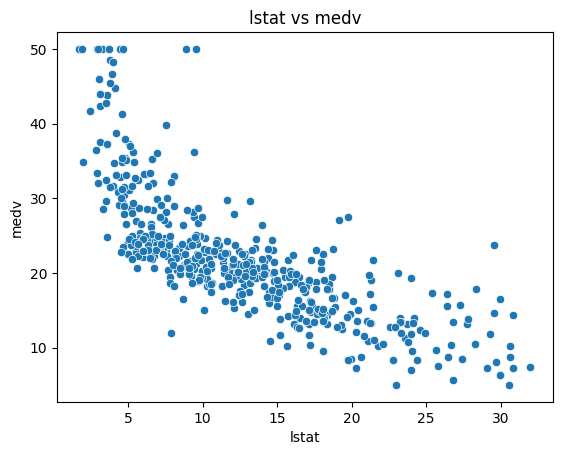

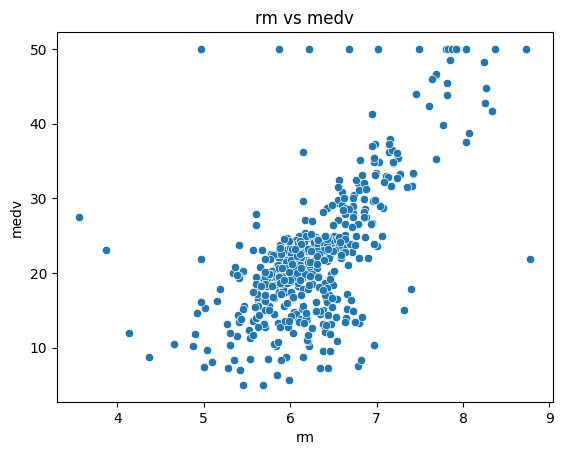

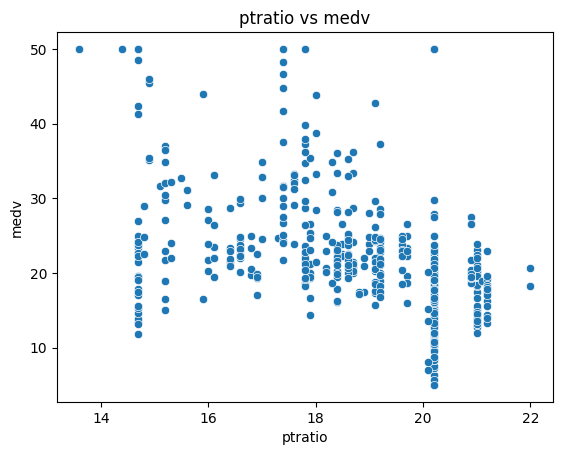

In [26]:
# Scatter plot between lstat and medv
sns.scatterplot(x='lstat', y='medv', data=df)
plt.title('lstat vs medv')
plt.show()

# Scatter plot between rm and medv
sns.scatterplot(x='rm', y='medv', data=df)
plt.title('rm vs medv')
plt.show()

# Scatter plot between ptratio and medv
sns.scatterplot(x='ptratio', y='medv', data=df)
plt.title('ptratio vs medv')
plt.show()


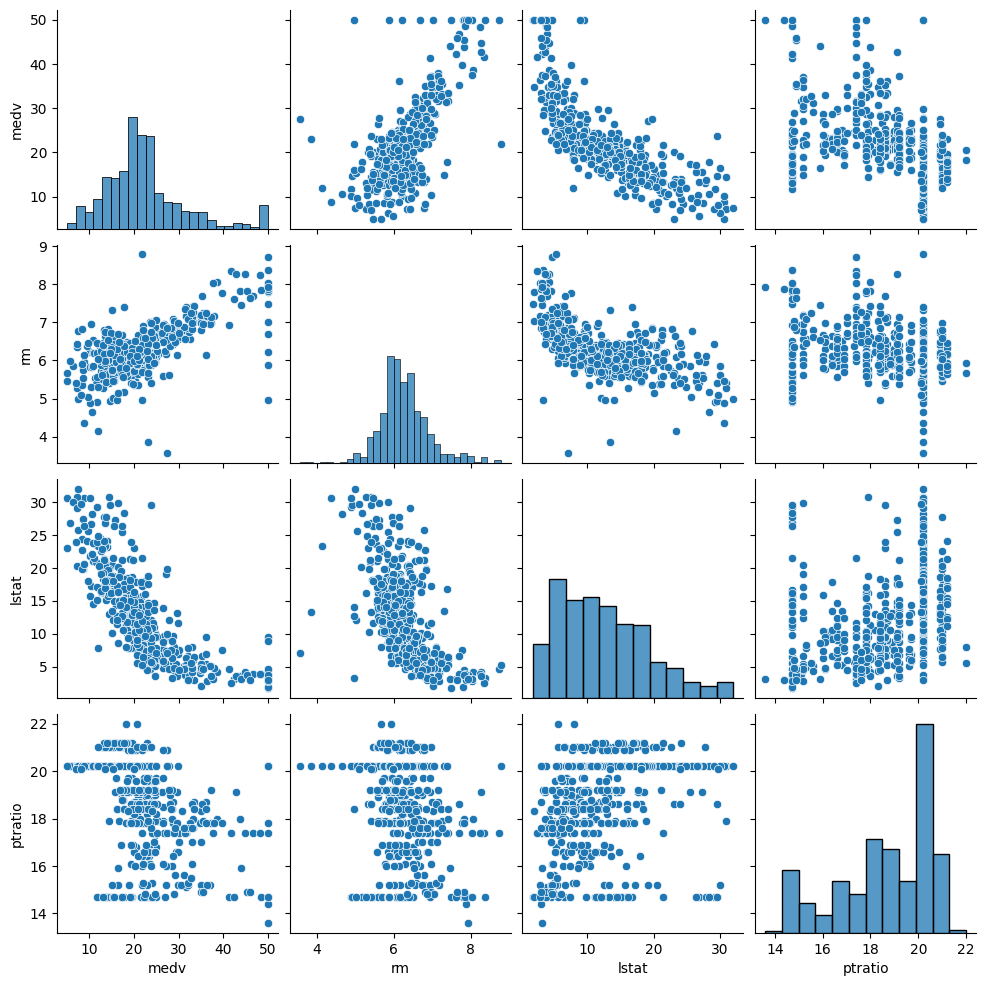

In [18]:
# You can select top features you want to compare with medv
sns.pairplot(df[['medv', 'rm', 'lstat', 'ptratio']])
plt.show()


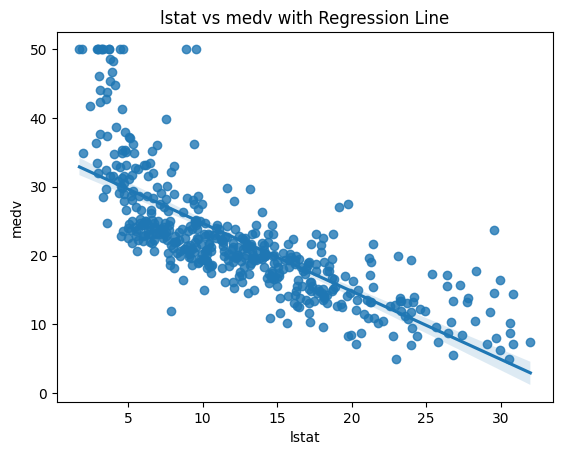

In [19]:
sns.regplot(x='lstat', y='medv', data=df)
plt.title('lstat vs medv with Regression Line')
plt.show()
